University of Michigan - ROB 101 Computational Linear Algebra

# Lab 2: Vectors, Matrices and Systems of Linear Equations

### Welcome to the world of Julia!

### Vectors and Matrices

Vectors and matrices are extensively used in this course. In Julia, vectors are a specific kind of matrix. For instance, a column vector is a matrix that only has one collumn. Let's first learn how to create a vector in Julia.

### Example 1. (Review on your own) Create Vectors and Matrices

In [1]:
# Create a row vector of all odd numbers from 0 to 9 
row_vec = [0 1 2 3 4 5 6 7 8 9]
# Note: the numbers in a row vector should be included in '[]' and seperated by spaces

1×10 Matrix{Int64}:
 0  1  2  3  4  5  6  7  8  9

In [2]:
# Create a column vector of all even numbers from 0 to 9
col_vec = [0; 1; 2; 3; 4; 5; 6; 7; 8; 9]
# Note: the numbers in a column vector should be seperated by ';'

10-element Vector{Int64}:
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9

We created row and column vectors of integers. Let's create vector of real numbers.

In [3]:
# Create a column vector which has 1.2, 2.4, and 4.8
real_vec = [1.2; 2.4; 4.8]
# Note: Float64 is a primitive data type in Julia for real numbers (floating-point values).
# Int64 shown in previous cells is the type for integers. You don't need to worry about other types for now.

3-element Vector{Float64}:
 1.2
 2.4
 4.8

We learned the syntax for creating vectors. Creating a matrix is as easy as creating multiple row vectors and using `;` to seperate each row. Make sure the number of entries in each row is the same, otherwise you will get an error.

In [4]:
# Create a 2-by-5 matrix where the 1st row are odd numbers and the 2nd row are even numbers from 0 to 9
A = [1 3 5 7 9; 0 2 4 6 8]

2×5 Matrix{Int64}:
 1  3  5  7  9
 0  2  4  6  8

### Practice 1.

In [6]:
# Create a column vector (called almost_zero_vec) of 5 entries: the 3rd entry is -1.5, and others are zeros
almost_zero_vec =
# your code here
almost_zero_vec = zeros(5)
almost_zero_vec[3] = -1.5
print(almost_zero_vec)  # Output: [0. 0. 0. -

[0.0, 0.0, -1.5, 0.0, 0.0]

In [7]:
# Autograder cell
using LinearAlgebra
test1 = norm(almost_zero_vec)
test2 = sum(abs.(almost_zero_vec[1:2]))
test3 = size(almost_zero_vec)[1]
println("all nothings means likely correct")
TF1 = @assert test1 == 1.5
TF2 = @assert test2 == 0.0
TF3 = @assert test3 == 5
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Matrix{Nothing}:
 nothing  nothing  nothing

In [ ]:
# Autograder cell

In [8]:
# Create a 3-by-4 matrix called zero_matrix with all zeros
zero_matrix = zeros(3,4)
# your code here

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [9]:
# Autograder cell
using LinearAlgebra
test1 = sum(zero_matrix)
test2 = size(zero_matrix)[1]
test3 = size(zero_matrix)[2]
println("all nothings means likely correct")
TF1 = @assert test1 == 0
TF2 = @assert test2 == 3
TF3 = @assert test3 == 4
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Matrix{Nothing}:
 nothing  nothing  nothing

In [ ]:
# Autograder cell

There are other convenient ways to create a vector/matrix with all zeros or the same numbers by using built-in functions (We will discuss more about functions in Lab4).

In [10]:
# Create a 3-by-4 matrix called two_matrix with all twos
two_matrix = ones(3, 4) .+ 1
# Note: ones() is a function returning a vector/matrix with all one, 3 and 4 specify the size, specifically, 
# 3 is the number of rows and 4 is the number of columns

3×4 Matrix{Float64}:
 2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0

We can also create a random vector/matrix by using functions in the Random pacakge.

In [12]:
# Create a 3-by-4 matrix called rand_matrix with random numbers
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed so that each of you get the same results. 
rand_matrix = rand(3, 4)

3×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453
 0.411294  0.520355   0.967143  0.574323
 0.972136  0.639562   0.131026  0.67765

### Example 2. (We will start here) Vector and Matrix Indexing

Indexing is used to select entries in vectors and matrices. Julia uses **1-based indexing** which means that the index starts at 1. Be aware that there is also 0-based indexing in some other programming languages, such as C++.

In [41]:
# We define some vectors and matrices
row_vec = [1 3 5 7 9]
almost_zero_vec=[0; 0; -pi; 0; 0; 0; 0]
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed so that each of you get the same results. 
rand_matrix = rand(3, 4)

3×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453
 0.411294  0.520355   0.967143  0.574323
 0.972136  0.639562   0.131026  0.67765

In [17]:
# Select the 1st number from a row_vector
num = row_vec[1]

1

In [5]:
# Select the non-zero number from our previous almost_zero_vec
num = almost_zero_vec[3]
# Note: because a vector has only one dimension, only one index is needed and it corresponds to 
# the location where the number is stored

-3.141592653589793

In [6]:
# Select the entry in the 1st row and 2nd column of rand_matrix
num = rand_matrix[1, 2]
# Note: 1 is the index for the row, and 2 is the index for the column

0.4600853424625171

We learned how to select one entry from vectors and matrices. We can also select the whole row or column from a matrix, which will be a vector.

In [18]:
# Select the 4th column of rand_matrix
vect = rand_matrix[:, 4]
# Note: when we want to select the whole column, we use `:` as the index for row, and vice versa.

3-element Vector{Float64}:
 0.9464532262313834
 0.5743234852783174
 0.6776499075995779

In [40]:
# Select the 1st row of rand_matrix
vect = rand_matrix[1, :]

4-element Vector{Float64}:
 0.5798621201341324
 0.014908849285099945
 0.8396219340580711
 0.9464532262313834

As you might notice, we did select the 1st row of the matrix. **However, Julia returned to us a column vector.** What if we want a row vector?

In [39]:
# Select the 1st row of rand_matrix as a row vector
row_vec = rand_matrix[1:1, 1:end]

1×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453

In [20]:
# Select the 1st row of rand_matrix as a row vector
# This will give the same result as the previous cell
row_vec = rand_matrix[1:1, :]

1×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453

### The indexing looks strange, doesn't it? Actually, this is what's going on: we are selecting a block of a matrix. The `1:1` means that from the 1st row to the 1st row, and `:` is short for `1:end`, where `1` and `end` are omitted for convenience.

In [21]:
# Declare a matrix
A = [1 2 3 0; 4 5 6 0; 7 8 9 0; 0 0 0 0]

4×4 Matrix{Int64}:
 1  2  3  0
 4  5  6  0
 7  8  9  0
 0  0  0  0

In [22]:
# Select the block of non-zero entries of the matrix
block = A[1:3, 1:3]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [23]:
# Select another small block of the matrix block with only entries in the middle
small_block = block[2:2, 2:2]

1×1 Matrix{Int64}:
 5

As you observe, selecting a block of a matrix will return a matrix, even though this block only has a single number! **The 1-by-1 matrix is different than a scalar.** But, we can extract the number from the 1-by-1 matrix by indexing.

In [24]:
# Extract the number in small_block
num = small_block[1]

5

In [25]:
# Let's compare
pi/small_block

LoadError: MethodError: no method matching /(::Irrational{:π}, ::Matrix{Int64})
The function `/` exists, but no method is defined for this combination of argument types.

You might have used a 2d row vector where a 1d column vector was required.
Note the difference between 1d column vector [1,2,3] and 2d row vector [1 2 3].
You can convert to a column vector with the vec() function.

[0mClosest candidates are:
[0m  /(::AbstractIrrational, [91m::AbstractIrrational[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mirrationals.jl:164[24m[39m
[0m  /(::Number, [91m::BitArray[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mbitarray.jl:1205[24m[39m
[0m  /(::Number, [91m::AbstractVector[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90mC:\Users\abhay\.julia\juliaup\julia-1.11.1+0.x64.w64.mingw32\share\julia\stdlib\v1.11\LinearAlgebra\src\[39m[90m[4mgeneric.jl:1168[24m[39m
[0m  ...


In [26]:
# Versus
pi/small_block[1]

0.6283185307179586

When we index as 'rand_matrix[n:m,p:q]' we will get a block matrix. Going back to our previous example, `row_vec = rand_matrix[1:1, 1:end]`, the returned block was a matrix with all selected numbers in order. That's why `row_vec = rand_matrix[1:1, 1:end]` returns a 1-by-4 matrix, i.e., a row vector!

In addition, we can also use **matrix transpose operator** `'` to get a row vector when we select a row of a matrix.

In [27]:
# Transpose the col_vec to get a row vector
col_vec_trans = col_vec'

1×10 adjoint(::Vector{Int64}) with eltype Int64:
 0  1  2  3  4  5  6  7  8  9

In [28]:
# Select the 1st row of rand_matrix as a row vector
row_vec = rand_matrix[1, 1:end]'

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.579862  0.0149088  0.839622  0.946453

### Practice 2.

In [29]:
# Let's recall what we placed into rand_matrix
rand_matrix

3×4 Matrix{Float64}:
 0.579862  0.0149088  0.839622  0.946453
 0.411294  0.520355   0.967143  0.574323
 0.972136  0.639562   0.131026  0.67765

In [30]:
# Select the smallest number of rand_matrix and call it small_num
small_num = rand_matrix[1, 2]
# your code here

0.014908849285099945

In [31]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert small_num < 0.02
TF2 = @assert small_num > 0.01
[TF1 TF2]

all nothings means likely correct


1×2 Matrix{Nothing}:
 nothing  nothing

In [32]:
# Autograder cell

In [58]:
# Select the column containing the smallest number of rand_matrix and return it as a row vector called row_vec
row_vec = rand_matrix[1:end, 2:2]'
# your code here

1×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0149088  0.520355  0.639562

In [59]:
# Autograder cell
using LinearAlgebra
test1 = norm(row_vec)
println("all nothings means likely correct")
TF1 = @assert test1 == 0.8246396989387587
TF2 = @assert size(row_vec)[1] == 1
TF3 = @assert size(row_vec)[2] == 3
[TF1 TF2 TF3]

all nothings means likely correct


1×3 Matrix{Nothing}:
 nothing  nothing  nothing

In [60]:
# Autograder cell

### Example 3. For Loops

In [61]:
# Declare a 3-by-3 matrix
A = [1 8 2; 0 3 7; 6 2 9]

3×3 Matrix{Int64}:
 1  8  2
 0  3  7
 6  2  9

### The terms A[k,k] of a matrix A, where the row number and column number are the same,  are called the  ***primary diagonal of the matrix*** 

In [62]:
# Compute the sum of the entries on the primary diagonal of A
sums = A[1, 1] + A[2, 2] + A[3, 3]

13

In [63]:
# Declare a 5-by-5 matrix
A = [2 7 3 4 1; 9 1 0 3 2; 7 4 9 2 0; 1 7 6 4 2; 7 4 9 5 8]

5×5 Matrix{Int64}:
 2  7  3  4  1
 9  1  0  3  2
 7  4  9  2  0
 1  7  6  4  2
 7  4  9  5  8

In [64]:
#  Compute the sum of the entries on the primary diagonal of A
sums = A[1, 1] + A[2, 2] + A[3, 3] + A[4, 4] + A[5, 5]

24

You may have noticed that the way we compute the sum of matrix diagonals can work for a small matrix. But what about a large matrix, say 100-by-100? It will be exhausting to index them manually. We program for a reason: to automate the computations! So what we can do?

To compute the sum of the entries on the primary diagonal, we need to index each element one by one. I am sure that you also noticed that there is a pattern in the indices: For a 3-by-3 matrix, the index starts from 1 and goes to 3; For a 5-by-5 matrix, the index is from 1 to 5, which is the size of the matrix.

**We can use a for loop to automate this process.**

For loops are used to iterate over a set of values and perform a set of operations that are given in the body of the loop. The syntax of foor loop in Julia is as follows:

```
for iterator in range
    statements to do stuff
end
```

Here, ```for``` is the keyword starting the for loop, the keyword ```in```  is used to define a range in which to iterate, the keyword ```end``` is used to denote the end of the for loop.

Let's see a few examples.

In [65]:
# Print the numbers from 1 to 10
for k in 1:10
    println(k)
end

1
2
3
4
5
6
7
8
9
10


If the range is defined as a set of numbers, the following syntax is also valid:

```
for iterator = start:step:stop
    statements to do stuff
end
```

Here, ```start:step:stop``` will return a list of numbers from ```start``` to ```stop``` with a step size of ```step```. Note the ```start``` and ```stop``` are inclusively considered....which simply that the iterator is always between or equal to the upper and lower bounds.

In [66]:
# Print the even numbers from 2 to 20
for k = 2:2:20
    println(k)
end

2
4
6
8
10
12
14
16
18
20


**Another thing worth noting is that the ```step``` can be negative.** It just means that the iterator is decreasing.

In [67]:
# Print the numbers from 5 to 1
for k = 5:-1:1
    println(k)
end

5
4
3
2
1


Okay, let's re-think of the previous problem of matrix diagonals summation.

In [68]:
# Declare a 30-by-30 random matrix
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed to make sure each time you run the cell you get the same results 
# so that we can grade them
A = rand(30, 30)

30×30 Matrix{Float64}:
 0.579862   0.00543656  0.126386  …  0.571334   0.328323   0.673974
 0.411294   0.698478    0.965243     0.124163   0.349247   0.245734
 0.972136   0.349231    0.515818     0.587931   0.793972   0.316147
 0.0149088  0.91097     0.488476     0.321161   0.0952038  0.585489
 0.520355   0.973653    0.527837     0.531414   0.665992   0.852246
 0.639562   0.76066     0.917137  …  0.59433    0.799811   0.580852
 0.839622   0.488912    0.706951     0.290677   0.171014   0.183946
 0.967143   0.362643    0.753203     0.855815   0.689584   0.202328
 0.789764   0.708738    0.573645     0.555287   0.270649   0.488165
 0.696041   0.656694    0.731872     0.861586   0.480495   0.988048
 0.566704   0.173863    0.829076  …  0.711169   0.745688   0.405814
 0.536369   0.69736     0.892646     0.698374   0.0675589  0.661413
 0.711389   0.191723    0.806471     0.599969   0.661991   0.520162
 ⋮                                ⋱                        
 0.715355   0.0177509   0.994935 

In [69]:
# Compute the sum of the entries on the primary diagonal
sums = 0 # Initialize sum as 0
for k = 1:30
    sums = sums + A[k, k]
end
println(sums)

15.828121297692357


For loops can be nested when more than one for loop is needed.

In [70]:
# Declare a 3-by-3 matrix
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [71]:
# Print all the numbers on and below the matrix primary diagonal
for i = 1:3
    for j = 1:i
        println(A[i,j])
    end
end

1
4
5
7
8
9


### Practice 3.

In [72]:
# Declare a 10-by-10 random matrix
using Random # Using an external pacakge called Random which provides functions
Random.seed!(1234) # Set the seed to make sure each time you get the same results
A = rand(10, 10)

10×10 Matrix{Float64}:
 0.579862   0.566704  0.526344   0.00543656  …  0.829076  0.587688  0.850302
 0.411294   0.536369  0.0779683  0.698478       0.892646  0.381363  0.124847
 0.972136   0.711389  0.966197   0.349231       0.806471  0.42562   0.993609
 0.0149088  0.103929  0.666558   0.91097        0.011625  0.661096  0.0686571
 0.520355   0.806704  0.333859   0.973653       0.249676  0.195737  0.953362
 0.639562   0.870539  0.802199   0.76066     …  0.139687  0.811324  0.484337
 0.839622   0.962715  0.156458   0.488912       0.180998  0.594965  0.131026
 0.967143   0.15118   0.380799   0.362643       0.813512  0.270995  0.946453
 0.789764   0.715355  0.0687591  0.708738       0.994935  0.566878  0.574323
 0.696041   0.939548  0.861725   0.656694       0.77916   0.607905  0.67765

In [73]:
# Compute the sum of the numbers on the matrix primary diagonal
sums = 0
# your code here
for i = 1:10
    sums += A[i,i]
end
sums

6.84133867975218

In [75]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert sums < 6.9
TF2 = @assert sums > 6.8
[TF1 TF2]

all nothings means likely correct


1×2 Matrix{Nothing}:
 nothing  nothing

In [76]:
# Autograder cell

In [77]:
# Compute the sum of the numbers on and above the matrix primary diagonal
sums = 0
# your code here
for i in 1:10
    for j in i:10
        sums += A[i,j]
    end
end
sums

28.902991362437746

In [78]:
# Autograder cell
println("all nothings means likely correct")
TF1 = @assert sums < 29
TF2 = @assert sums > 28
[TF1 TF2]

all nothings means likely correct


1×2 Matrix{Nothing}:
 nothing  nothing

In [79]:
# Autograder cell

### Example 4. How to solve a system of linear equations when it's not too big

** We will study the matrix inverse in Chapter 6...that's a long ways off. To give you a head start and to show you 
how to check answers to systems of linear equations, we introduce the matrix inverse function, ```inv()```, a function in the Linear Algebra pacakge. It is only defined for square matrices and even then, not for all square matrices. We'll get the details in Chapter 6.** 

In [101]:
# Declare a 3-by-3 matrix
A = [1 3 6; 0 6 1; 7 8 2]
# Declare a 3-by-1 vector
b=[-2; 11; 6.4]
# Compute the solution of Ax = b
using LinearAlgebra
x = inv(A)*b
bro = A*x-b

3-element Vector{Float64}:
 0.0
 0.0
 1.7763568394002505e-15

**For debugging your code, you can use ```assert``` operator to check if two values are equal.**

In [102]:
# Check if inv_A is the correct inversion
@assert isapprox(vec(A*x-b), vec([0; 0;  1.7763568394002505e-15]))
# Note: Ax=b if, and only if, Ax-b = 0.

## What can we do using for loops?

<img align="left" src="https://c.tenor.com/TSfv9OumbmsAAAAC/boueibu-yumoto-hakone.gif"/>

## Area of a Shape via Triangles

#### The method is to divide the shape into triangles and add up the area of each triangle.
#### Warning: We are using a fast way to compute the area of triangle that is NOT taught in High School.

### Example. Area of a Circle

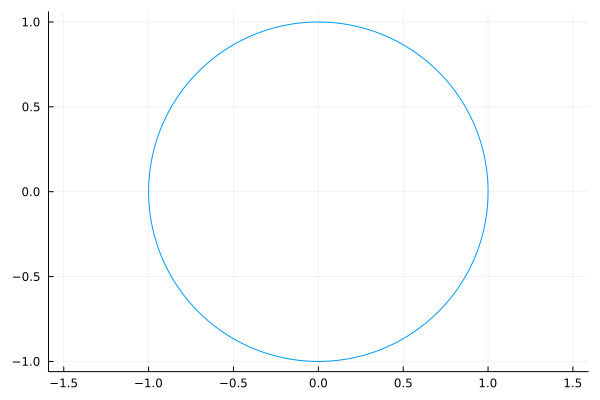

In [106]:
# Plot a circle
using LinearAlgebra
using Plots
th=[-pi:0.01:pi;]
top=cos.(th)
bottom=sin.(th)
plot(top, bottom, legend=false, aspectratio=:equal)

#### Area of a  unit circle should be $\pi$. How close can we come?

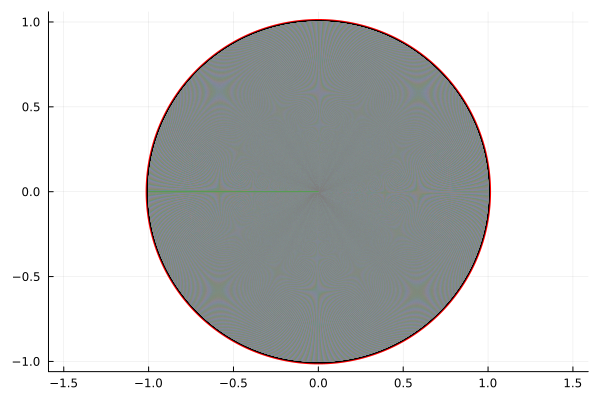

-5.167637207037501e-8

In [109]:
# Approximate the area of a unit circle via triangles
N=20000 # Number of triangles
ths=[-pi:(2*pi/N):pi;]
n=length(ths)
Xs=cos.(ths)
Ys=sin.(ths)
p1=plot(X,Y,linewidth=6, color=:red)
p1=plot!(Xs, Ys, legend=false, aspectratio=:equal,linewidth=4, color=:black)
for k=1:n
    plot!([0;Xs[k]],[0;Ys[k]])
end
display(p1)
Area=0.0
n=length(ths)
Xs=[Xs;Xs[1]]
Ys=[Ys;Ys[1]]
for k=1:n
    u=[Xs[k];Ys[k];0.0]
    v=[Xs[k+1];Ys[k+1];0.0]
    AreaTriangle=0.5*norm(cross(u,v))
    Area = Area+AreaTriangle
end
Area-pi

### Problem. Area of a Heart!

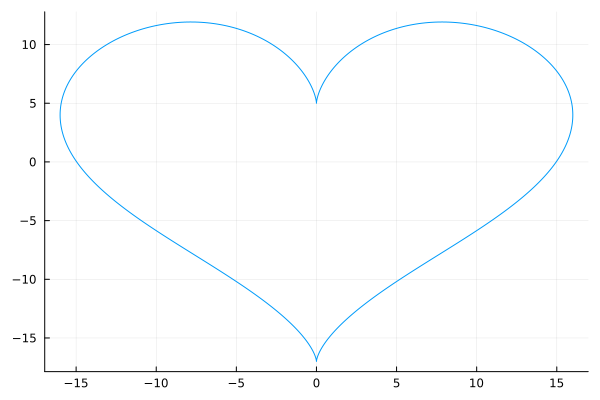

In [110]:
# Plot a heart shape
using LinearAlgebra
using Plots
th=[-pi:0.01:pi;]
X=16*(sin.(th)).^3
Y=13.0*cos.(th)-5.0*cos.(2.0*th)-2.0*cos.(3.0*th)-1.0cos.(4.0*th)
plot(X, Y, legend = false)

In [111]:
# Compute the actual area of the heart shape
Area=0.0
n=length(th)
X=[X;X[1]]
Y=[Y;Y[1]]
for k=1:n
    u=[X[k];Y[k];0.0]
    v=[X[k+1];Y[k+1];0.0]
    AreaTriangle=0.5*norm(cross(u,v))
    Area = Area+AreaTriangle
end
Area

565.4672003218795

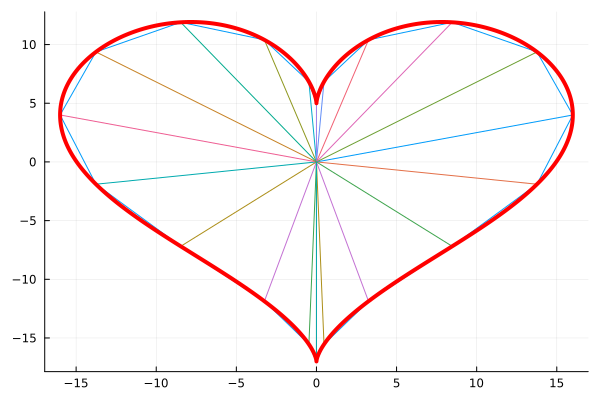

In [112]:
# Divide the heart shape into triangles
N=20 # Number of triangles
ths=[-pi:(2*pi/N):pi;]
n=length(ths)
Xs=16*(sin.(ths)).^3
Ys=13.0*cos.(ths)-5.0*cos.(2.0*ths)-2.0*cos.(3.0*ths)-1.0cos.(4.0*ths)
p1=plot(Xs, Ys, legend=false)
for k=1:n
    plot!([0;Xs[k]],[0;Ys[k]])
end
plot!(X,Y,linewidth=4, color=:red)
p1

In [113]:
# Approximate the area of the heart shape via triangles
Area=0.0
n=length(ths)
Xs=[Xs;Xs[1]]
Ys=[Ys;Ys[1]]
# your code here
throw(ErrorException())
Area

LoadError: MethodError: no method matching ErrorException()
The type `ErrorException` exists, but no method is defined for this combination of argument types when trying to construct it.

[0mClosest candidates are:
[0m  ErrorException([91m::AbstractString[39m)
[0m[90m   @[39m [90mCore[39m [90m[4mboot.jl:323[24m[39m
[0m  ErrorException([91m::Any[39m)
[0m[90m   @[39m [90mCore[39m [90m[4mboot.jl:323[24m[39m


In [ ]:
# Autograder cell
@assert abs(Area-565.4672003218795) < 19

In [ ]:
# Autograder cell

Reference: https://www.stumblingrobot.com/2016/05/09/give-vector-based-proof-herons-formula-computing-area-triangle/